<a href="https://colab.research.google.com/github/JatinSharma222/AI-experiments-Univaersity/blob/main/Experiment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Experiment 3
Evaluating model performance using cross-validation techniques and metrics such as accuracy, precision , recall and F1-score


In [2]:

# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
file_path = '/content/Titanic-Dataset.csv'
titanic_data = pd.read_csv(file_path)

# Display the first few rows and basic info
titanic_data.head(), titanic_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


(   PassengerId  Survived  Pclass  \
 0            1         0       3   
 1            2         1       1   
 2            3         1       3   
 3            4         1       1   
 4            5         0       3   
 
                                                 Name     Sex   Age  SibSp  \
 0                            Braund, Mr. Owen Harris    male  22.0      1   
 1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                             Heikkinen, Miss. Laina  female  26.0      0   
 3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                           Allen, Mr. William Henry    male  35.0      0   
 
    Parch            Ticket     Fare Cabin Embarked  
 0      0         A/5 21171   7.2500   NaN        S  
 1      0          PC 17599  71.2833   C85        C  
 2      0  STON/O2. 3101282   7.9250   NaN        S  
 3      0            113803  53.1000  C123        S  
 4      0            373450   8.0500

## Feature Engineering

In [3]:

# Fill missing Age values with median
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)

# Fill missing Embarked values with the most common port
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

# Create a new feature 'FamilySize' by combining 'SibSp' and 'Parch'
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch']

# Create a new feature 'IsAlone' indicating whether a passenger has no family aboard
titanic_data['IsAlone'] = np.where(titanic_data['FamilySize'] > 0, 0, 1)

# Convert 'Sex' and 'Embarked' into numeric values
titanic_data['Sex'] = titanic_data['Sex'].map({'male': 0, 'female': 1})
titanic_data['Embarked'] = titanic_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Drop unnecessary columns
titanic_data = titanic_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

# Display the updated dataset with new features
titanic_data.head()


<ipython-input-3-a098108fe602>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
<ipython-input-3-a098108fe602>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
0,0,3,0,22.0,1,0,7.2500,2,1,0
1,1,1,1,38.0,1,0,71.2833,0,1,0
2,1,3,1,26.0,0,0,7.9250,2,0,1
3,1,1,1,35.0,1,0,53.1000,2,1,0
4,0,3,0,35.0,0,0,8.0500,2,0,1


## Feature Importance Visualization

<ipython-input-4-9a219f4a22c2>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importances, palette='viridis')


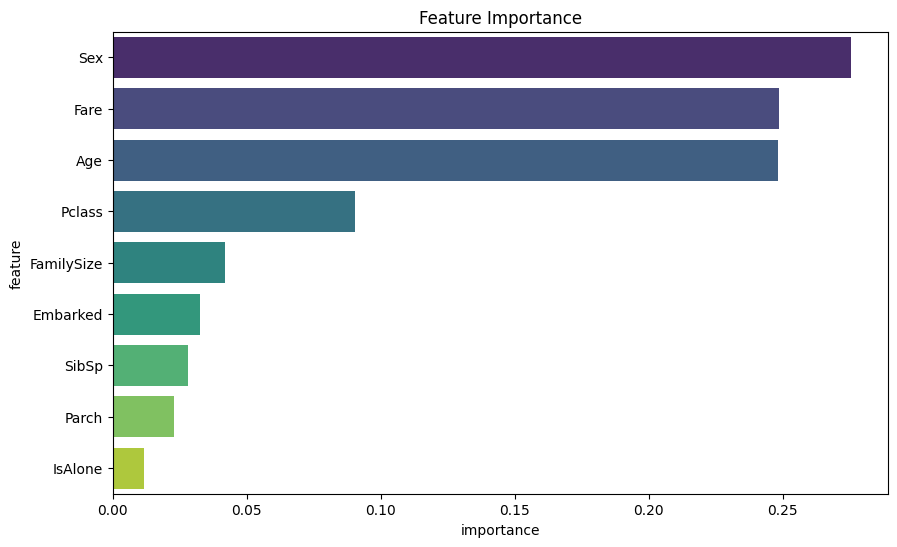

In [4]:

# Separate target and features
X = titanic_data.drop(columns=['Survived'])
y = titanic_data['Survived']

# Use RandomForestClassifier to fit and get feature importance
from sklearn.ensemble import RandomForestClassifier

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Get feature importances and visualize
importances = model.feature_importances_
feature_names = X.columns
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})

# Sort features by importance and plot
feature_importances = feature_importances.sort_values(by='importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances, palette='viridis')
plt.title('Feature Importance')
plt.show()


## Cross-Validation and Model Evaluation

We will evaluate the performance of machine learning models using cross-validation and compute metrics such as:
- **Accuracy**: Overall correctness of the model.
- **Precision**: Proportion of true positive predictions among all positive predictions.
- **Recall**: Proportion of true positive predictions among all actual positives.
- **F1-Score**: Harmonic mean of precision and recall.

In [5]:
# Importing necessary libraries for model evaluation
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score

# Splitting features and target variable
X = titanic_data.drop(['Survived'], axis=1)
y = titanic_data['Survived']

# Encoding categorical variables (assuming preprocessing is required)
X = pd.get_dummies(X, drop_first=True)

# Initialize a Random Forest model
model = RandomForestClassifier(random_state=42)

# Custom scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

# Perform cross-validation
cv_results = cross_validate(model, X, y, cv=5, scoring=scoring, return_train_score=False)

# Display the average results
for metric in scoring.keys():
    print(f'Mean {metric}: {cv_results[f"test_{metric}"].mean():.4f}')


Mean accuracy: 0.8160
Mean precision: 0.7706
Mean recall: 0.7425
Mean f1: 0.7548


### Summary of Cross-Validation Results
The average metrics from the cross-validation give us an insight into the model's performance. We can fine-tune the model or try other models for better performance if needed.